# Time Series Forecasting of Stock Market Data with ARIMA in Python


Author: Dr. Muhammad Aammar Tufail\
[<img src="https://raw.githubusercontent.com/FortAwesome/Font-Awesome/6.x/svgs/brands/youtube.svg" width="50" height="50">](https://www.youtube.com/channel/UCmNXJXWONLNF6bdftGY0Otw/)
[<img src="https://raw.githubusercontent.com/FortAwesome/Font-Awesome/6.x/svgs/brands/linkedin.svg" width="50" height="50">](https://www.linkedin.com/in/dr-muhammad-aammar-tufail-02471213b/)
[<img src="https://raw.githubusercontent.com/FortAwesome/Font-Awesome/6.x/svgs/brands/github.svg" width="50" height="50">](https://github.com/AammarTufail)
[<img src="https://raw.githubusercontent.com/FortAwesome/Font-Awesome/6.x/svgs/brands/twitter.svg" width="50" height="50">](https://twitter.com/aammar_tufail)
[<img src="https://raw.githubusercontent.com/FortAwesome/Font-Awesome/6.x/svgs/brands/facebook.svg" width="50" height="50">](https://www.facebook.com/groups/codanics/permalink/)


# 1. Time Series Data
`Time series` data is a type of data that is collected over time at regular intervals. It is a sequence of data points that are ordered chronologically and can be used to analyze trends, patterns, and behaviors over time. Time series data can be collected from a variety of sources, such as sensors, financial markets, weather stations, and social media platforms.

Examples of time series data include stock prices, temperature readings, website traffic, and sales data. Time series data can be analyzed using various statistical and machine learning techniques, such as regression analysis, ARIMA models, and deep learning models.

Time series data is often used in forecasting and prediction applications, where the goal is to predict future values based on past observations. Time series analysis can also be used to identify anomalies, trends, and seasonality in the data, which can provide insights into the underlying processes that generate the data.

`Overall,` time series data is an important type of data that is used in many different fields, including finance, economics, engineering, and social sciences.

- `Time series` data is a sequence of data points collected over time that can be used to analyze trends and patterns. It can be collected from various sources and analyzed using statistical and machine learning techniques. 
- `Time series forecasting` is the process of predicting future values based on past observations. Time series data is used in many different fields, including finance, economics, engineering, and social sciences.

# Stock Market Data scraping in Python

In [2]:
# imporot libraries
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
#import yfinance as yf
import datetime as dt
from datetime import date, timedelta
import plotly.graph_objects as go
import plotly.express as px

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [3]:
date.today()

datetime.date(2025, 2, 3)

In [4]:
# define the dates to fetch data
today = date.today()
d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=365)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2
print("Your data will be between these dates: ", start_date, end_date)

Your data will be between these dates:  2024-02-04 2025-02-03


In [8]:
# deifne the ticker
ticker = 'GOOGL'

df = pd.read_excel("DJIA_Jan2016_Dec2016.xlsx")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,17405.480469,17405.480469,16957.630859,17148.939453,17148.939453,148060000
1,2016-01-05,17147.500000,17195.839844,17038.609375,17158.660156,17158.660156,105750000
2,2016-01-06,17154.830078,17154.830078,16817.619141,16906.509766,16906.509766,120250000
3,2016-01-07,16888.359375,16888.359375,16463.630859,16514.099609,16514.099609,176240000
4,2016-01-08,16519.169922,16651.890625,16314.570313,16346.450195,16346.450195,141850000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       252 non-null    datetime64[ns]
 1   Open       252 non-null    float64       
 2   High       252 non-null    float64       
 3   Low        252 non-null    float64       
 4   Close      252 non-null    float64       
 5   Adj Close  252 non-null    float64       
 6   Volume     252 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 13.9 KB


In [10]:
df.insert(0, "Date", df.index, True)
# df["Date"] = df.index
df.reset_index(drop=True, inplace=True)

In [11]:
df.head()

,Date,Date,Open,High,Low,Close,Adj Close,Volume
0,0,2016-01-04,17405.480469,17405.480469,16957.630859,17148.939453,17148.939453,148060000
1,1,2016-01-05,17147.500000,17195.839844,17038.609375,17158.660156,17158.660156,105750000
2,2,2016-01-06,17154.830078,17154.830078,16817.619141,16906.509766,16906.509766,120250000
3,3,2016-01-07,16888.359375,16888.359375,16463.630859,16514.099609,16514.099609,176240000
4,4,2016-01-08,16519.169922,16651.890625,16314.570313,16346.450195,16346.450195,141850000


In [12]:
df.describe()

,Date,Date,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,125.500000,2016-07-02 16:51:25.714285824,17920.076412,18000.323765,17835.804649,17927.107348,17927.107348,1.172089e+08
min,0.000000,2016-01-04 00:00:00,15691.620117,15897.820313,15450.559570,15660.179688,15660.179688,4.589000e+07
25%,62.750000,2016-04-04 18:00:00,17525.857422,17644.430664,17477.860351,17535.373047,17535.373047,8.224250e+07
50%,125.500000,2016-07-03 00:00:00,17989.160156,18039.750000,17931.900390,18003.955078,18003.955078,9.410500e+07
75%,188.250000,2016-09-30 18:00:00,18466.487305,18526.540039,18409.964844,18475.290039,18475.290039,1.203550e+08
max,251.000000,2016-12-30 00:00:00,19968.970703,19987.630859,19941.960938,19974.619141,19974.619141,5.734700e+08
std,72.890329,NaN,936.518590,915.514043,973.716467,942.755393,942.755393,6.875709e+07


In [14]:
# make a plot on plotly
#fig = px.line(df, x='Date', y=df.columns, title='Stock Price')
#fig.show()

In [15]:
# select columns
df = df[['Date', 'Close']]
df.head()

,Date,Date,Close
0,0,2016-01-04,17148.939453
1,1,2016-01-05,17158.660156
2,2,2016-01-06,16906.509766
3,3,2016-01-07,16514.099609
4,4,2016-01-08,16346.450195


In [17]:
# plot the data to see how it looks like using plotly
#fig = px.line(df, x='Date', y='Close', title='Google Stock Price')
#fig.show()

#

In [18]:
# stationarity check on data
from statsmodels.tsa.stattools import adfuller
def adf_test(df):
    result = adfuller(df)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    if result[1] <= 0.05:
        print("Reject the null hypothesis. Data is stationary")
    else:
        print("Fail to reject the null hypothesis. Data is not stationary")

adf_test(df['Close'])

ADF Statistic: -0.462320
p-value: 0.899162
Fail to reject the null hypothesis. Data is not stationary


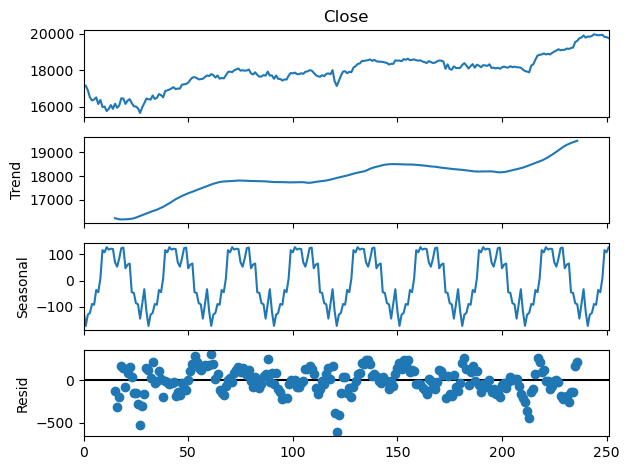

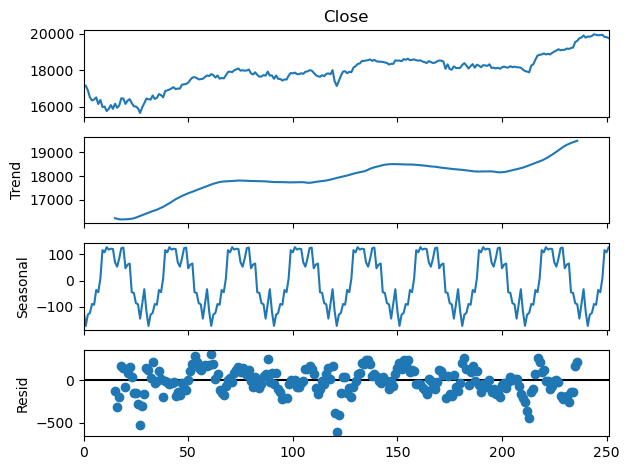

In [19]:
# decompose the data to see the trend, seasonality and noise
from statsmodels.tsa.seasonal import seasonal_decompose
decompose = seasonal_decompose(df['Close'], model='additive', period=30)
decompose.plot()

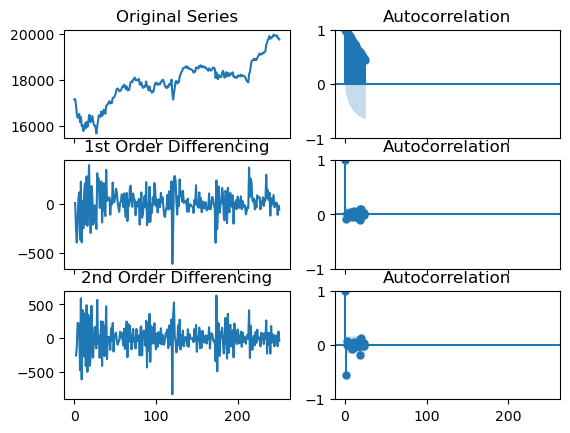

In [20]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df['Close']); axes[0, 0].set_title('Original Series')
plot_acf(df['Close'], ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df['Close'].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df['Close'].diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df['Close'].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df['Close'].diff().diff().dropna(), ax=axes[2, 1])

plt.show()

`d = 1`

# Lets find `p` value

In [21]:
# plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# pd.plotting.autocorrelation_plot(df['Close'])

# plot_acf(df['Close'], alpha=0.05)

from statsmodels.tsa.stattools import acf, pacf
x_acf = pd.DataFrame(acf(df['Close']))
print(x_acf)

           0
0   1.000000
1   0.980618
2   0.962438
3   0.942486
4   0.919925
5   0.897124
6   0.875047
7   0.852941
8   0.828320
9   0.804833
10  0.780997
11  0.755868
12  0.728679
13  0.701428
14  0.676513
15  0.651856
16  0.630079
17  0.608173
18  0.587677
19  0.566469
20  0.547380
21  0.524962
22  0.503071
23  0.481423
24  0.459447


`p = 2`

# Lets find `q` value

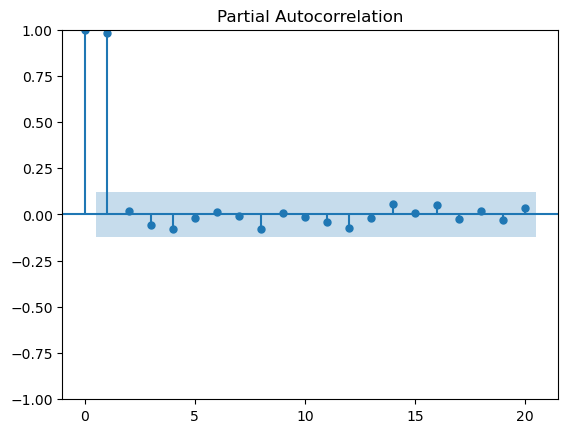

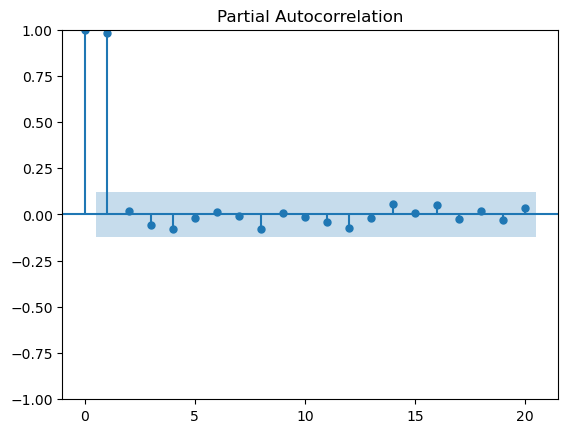

In [22]:
# partial autocorrelation
from statsmodels.tsa.stattools import acf, pacf
plot_pacf(df['Close'], lags=20, alpha=0.05)

In [23]:
# lets define p, d, q
p = 2
d = 1
q = 2

In [24]:
# lets run arima with pmdarima
from pmdarima.arima import auto_arima

model = auto_arima(df['Close'], start_p=1, start_q=1, max_p=2, max_q=2, m=12, start_P=0, seasonal=True, d=1, D=1, trace=True, error_action='ignore', suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=0.36 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=3194.459, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=3130.766, Time=0.14 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.24 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=3193.662, Time=0.03 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=3111.260, Time=0.36 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=1.20 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.33 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=3111.831, Time=0.35 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=3112.574, Time=0.45 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=inf, Time=1.63 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=3111.522, Time=0.37 sec
 ARIMA(2,1,1)(2,1,0)[12]             : AIC=3114.011, Time=1.55 sec
 ARIMA(1,1,0)(2,1,0)[12] intercept   : AIC=3112.819, Time=1.36 sec

Best model:  ARIMA(1,1,0)(2,1,0)[12]       

In [25]:
print(model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  252
Model:             SARIMAX(1, 1, 0)x(2, 1, 0, 12)   Log Likelihood               -1551.630
Date:                            Mon, 03 Feb 2025   AIC                           3111.260
Time:                                    15:34:39   BIC                           3125.166
Sample:                                         0   HQIC                          3116.864
                                            - 252                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1014      0.053     -1.914      0.056      -0.205       0.002
ar.S.L12      -0.6747      0.057   

In [26]:
model = auto_arima(df['Close'], seasonal=True, suppress_warnings=True)
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  252
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -1590.051
Date:                Mon, 03 Feb 2025   AIC                           3182.102
Time:                        15:34:40   BIC                           3185.627
Sample:                             0   HQIC                          3183.521
                                - 252                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.862e+04   1180.565     15.770      0.000    1.63e+04    2.09e+04
Ljung-Box (L1) (Q):                   1.82   Jarque-Bera (JB):                55.98
Prob(Q):                              0.18   Pr

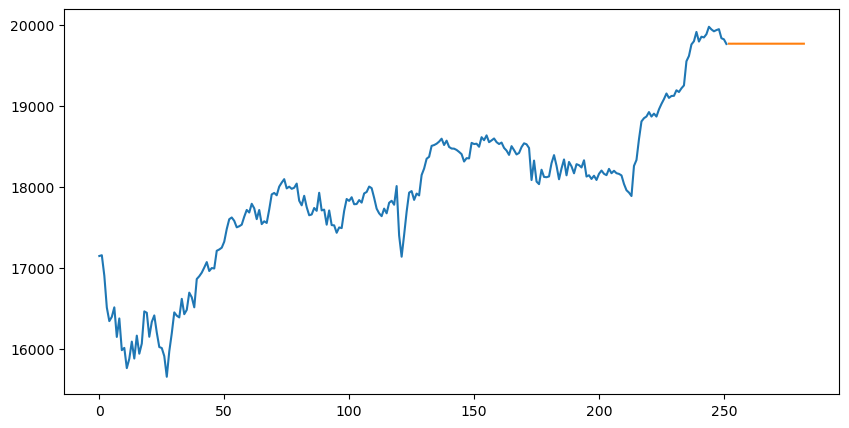

In [27]:
# stats model and arima
from statsmodels.tsa.arima.model import ARIMA
p, d, q = 2, 1, 2

model = ARIMA(df['Close'], order=(p, d, q))
model = model.fit()
# print(model.summary())

# predict next 30 days
forecast = model.predict(len(df["Close"]), len(df['Close'])+30)
# print(forecast)

#plot forecast
plt.figure(figsize=(10, 5))
plt.plot(df['Close'], label='Actual')
plt.plot(forecast, label='Forecast')

In [28]:
# let's run SARIMA
import statsmodels.api as sm
import warnings

p , d, q = 2, 1, 2

model = sm.tsa.statespace.SARIMAX(df['Close'], 
                                  order=(p, d, q), 
                                  seasonal_order=(p, d, q, 12))
model = model.fit()
print(model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  252
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 12)   Log Likelihood               -1535.220
Date:                            Mon, 03 Feb 2025   AIC                           3088.440
Time:                                    15:34:45   BIC                           3119.729
Sample:                                         0   HQIC                          3101.049
                                            - 252                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0647      0.030     35.756      0.000       1.006       1.123
ar.L2         -0.9968      0.028   

C:\Users\Dell\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


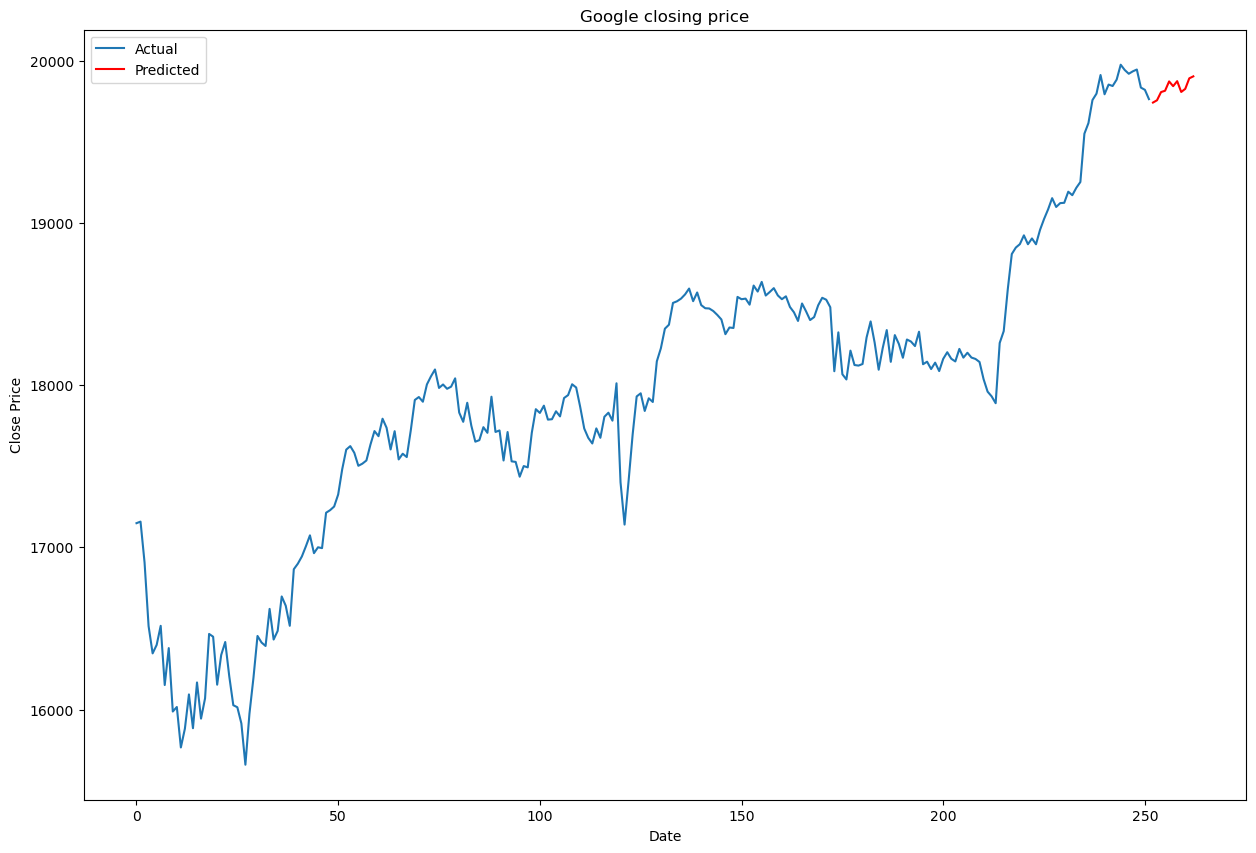

In [29]:
predictions = model.predict(start=len(df['Close']), end=len(df['Close'])+10)

# plot the predictions
plt.figure(figsize=(15, 10))
plt.plot(df["Close"], label='Actual')
plt.plot(predictions, color='red', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Google closing price')
# change legend location
plt.legend(loc='upper left')
plt.show()


C:\Users\Dell\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Dell\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Dell\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


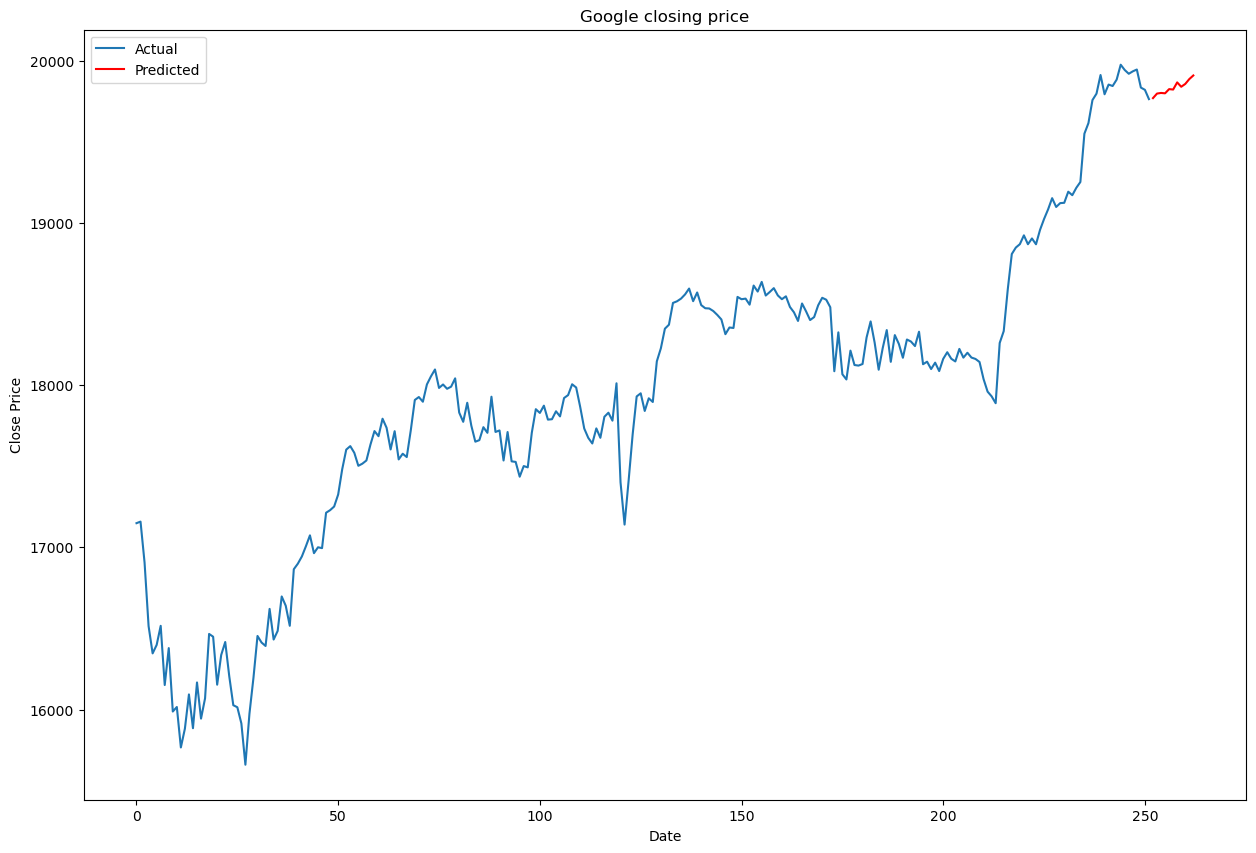

In [30]:
# lets update p, d, q
# let's run SARIMA
import statsmodels.api as sm
import warnings

p , d, q = 3, 1, 2

model = sm.tsa.statespace.SARIMAX(df['Close'], 
                                  order=(p, d, q), 
                                  seasonal_order=(p, d, q, 12))
model = model.fit()
predictions = model.predict(start=len(df['Close']), end=len(df['Close'])+10)

# plot the predictions
plt.figure(figsize=(15, 10))
plt.plot(df["Close"], label='Actual')
plt.plot(predictions, color='red', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Google closing price')
# change legend location
plt.legend(loc='upper left')
plt.show()

# hyper paramter tuning

C:\Users\Dell\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Dell\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Dell\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Best SARIMA(0, 1, 1)x(0, 1, 1, 12)12 model - AIC:2862.3399105235894


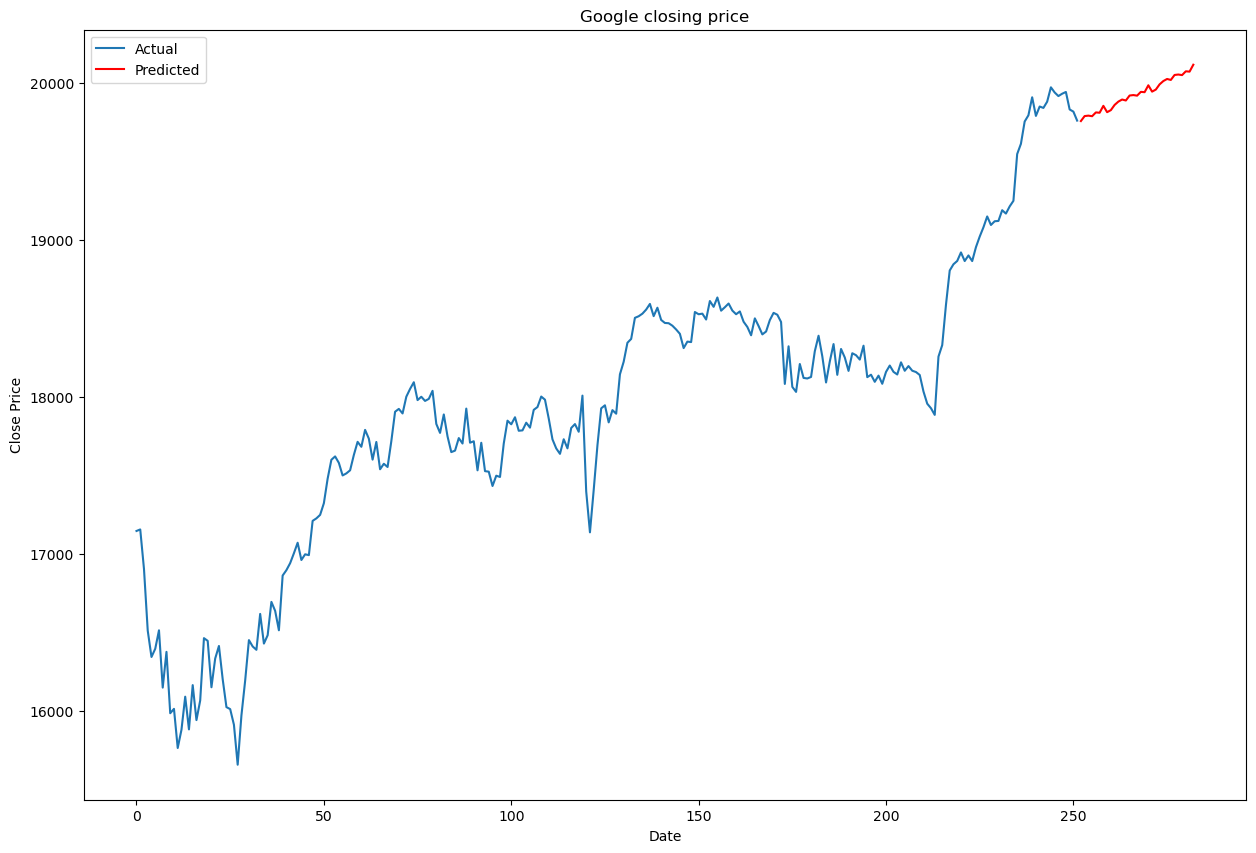

In [31]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import numpy as np
import itertools

# Assume you have a DataFrame 'df' with your time series data in a column named 'value'
# Assume that the seasonal period of your time series data is 12 (e.g., monthly data)

# Define the p, d, q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, d, q and m quadruplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None

for param in pdq:
    for param_seasonal in seasonal_pdq:
        
        try:
            temp_model = SARIMAX(df['Close'],
                                 order = param,
                                 seasonal_order = param_seasonal,
                                 enforce_stationarity=False,
                                 enforce_invertibility=False)
            results = temp_model.fit()

            # print("SARIMA{}x{}12 - AIC:{}".format(param, param_seasonal, results.aic))
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
        except:
            continue

print("Best SARIMA{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))

# predict next 30 days
model = SARIMAX(df['Close'],
                order = best_pdq,
                seasonal_order = best_seasonal_pdq,
                enforce_stationarity=False,
                enforce_invertibility=False)
model = model.fit()
predictions = model.predict(len(df['Close']), len(df['Close'])+30)
# plot the predictions
plt.figure(figsize=(15, 10))
plt.plot(df["Close"], label='Actual')
plt.plot(predictions, color='red', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Google closing price')
# change legend location
plt.legend(loc='upper left')
plt.show()


In [32]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Close   No. Observations:                  252
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -1428.170
Date:                            Mon, 03 Feb 2025   AIC                           2862.340
Time:                                    15:35:08   BIC                           2872.588
Sample:                                         0   HQIC                          2866.476
                                            - 252                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0465      0.049     -0.949      0.342      -0.142       0.049
ma.S.L12      -0.9998     41.089     -0.024      0.981     -81.533      79.533
sigma2      1.687e+04   6.92e+05      0.024      0.981   -1.34e+06    1.37e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                66.36
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):               0.51   Skew:                            -0.13
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""